In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
import numpy

import os

Using TensorFlow backend.


In [2]:
paths = ['data/train/islamic' , 'data/train/colonial' , 'data/train/ancient', 'data/train/sidibou' , 
        'data/validation/islamic' , 'data/validation/colonial' , 'data/validation/ancient', 'data/validation/sidibou']

def rename_files():
    for path in paths:
        i = 1
        files = os.listdir(path)
        for file in files:
            _, file_extension = os.path.splitext(file)
            os.rename(os.path.join(path, file), os.path.join(path, path.split("/")[2]+ "{0:03}".format(i) +".jpg"))
            i = i+1

In [29]:
rename_files()


In [3]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')



In [6]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('th1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='ancient', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [9]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 128, 128)
else:
    input_shape = (128, 128, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(128, 128),  
        batch_size=batch_size,
        class_mode='categorical') 

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode='categorical')

Found 2299 images belonging to 4 classes.
Found 300 images belonging to 4 classes.


In [31]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50
125/125 [==============================] - 21s 164ms/step - loss: 1.2137 - acc: 0.4745 - val_loss: 1.1489 - val_acc: 0.4407
Epoch 2/50
125/125 [==============================] - 18s 143ms/step - loss: 1.0869 - acc: 0.5294 - val_loss: 1.0526 - val_acc: 0.5292
Epoch 3/50
125/125 [==============================] - 19s 150ms/step - loss: 1.0610 - acc: 0.5341 - val_loss: 1.0988 - val_acc: 0.5051
Epoch 4/50
125/125 [==============================] - 20s 159ms/step - loss: 0.9746 - acc: 0.6041 - val_loss: 0.9930 - val_acc: 0.5635
Epoch 5/50
125/125 [==============================] - 18s 145ms/step - loss: 1.0840 - acc: 0.5341 - val_loss: 1.0165 - val_acc: 0.5495
Epoch 6/50
125/125 [==============================] - 18s 141ms/step - loss: 0.9777 - acc: 0.5960 - val_loss: 1.0093 - val_acc: 0.5354
Epoch 7/50
125/125 [==============================] - 18s 141ms/step - loss: 0.9665 - acc: 0.5956 - val_loss: 1.0341 - val_acc: 0.5317
Epoch 8/50
125/125 [==============================] - 1

In [32]:
model.save_weights('first_try.h5') 

Epoch 1/50
125/125 [==============================] - 19s 150ms/step - loss: 0.8897 - acc: 0.6425 - val_loss: 0.7064 - val_acc: 0.7134
Epoch 2/50
125/125 [==============================] - 19s 153ms/step - loss: 0.8403 - acc: 0.6708 - val_loss: 0.7889 - val_acc: 0.6853
Epoch 3/50
125/125 [==============================] - 19s 154ms/step - loss: 0.8466 - acc: 0.6449 - val_loss: 0.6993 - val_acc: 0.6856
Epoch 4/50
125/125 [==============================] - 23s 184ms/step - loss: 0.7859 - acc: 0.6983 - val_loss: 0.8450 - val_acc: 0.6701
Epoch 5/50
125/125 [==============================] - 23s 187ms/step - loss: 0.7715 - acc: 0.6860 - val_loss: 0.9737 - val_acc: 0.6510
Epoch 6/50
125/125 [==============================] - 22s 178ms/step - loss: 0.7880 - acc: 0.6934 - val_loss: 0.6566 - val_acc: 0.7551
Epoch 7/50
125/125 [==============================] - 21s 168ms/step - loss: 0.7820 - acc: 0.6873 - val_loss: 0.6693 - val_acc: 0.7373
Epoch 8/50
125/125 [==============================] - 2

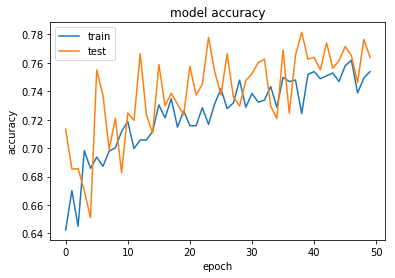

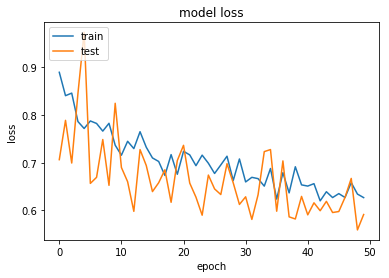

In [37]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
model.save_weights('second_try.h5') 